# Algerian Forest Fires Dataset

Data Set Information:
The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia
region located in the northeast of Algeria and the Sidi Bei-abbes region located in the northwest of
Algeria.

122 instances for each region.
The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output
attribute (class) The 244 instances have been classified into fire(138 classes) and not fire (106
classes) classes.

Attribute Information:
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data
observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in 0/0: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: O to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv("synthetic_forest_fires_two_regions.csv")

In [3]:
dataset.head()

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia Region Dataset,7,9,2013,38,22,21,3.7,42.4,4.1,5.5,0.6,24.8,5.6,not fire
1,Bejaia Region Dataset,20,8,2013,24,52,9,15.6,68.2,28.9,4.6,1.6,14.2,8.5,not fire
2,Bejaia Region Dataset,29,8,2014,34,25,29,7.0,74.5,16.5,22.6,5.1,6.7,0.8,not fire
3,Bejaia Region Dataset,15,9,2012,44,69,10,1.2,36.7,29.0,20.9,12.0,31.5,2.6,not fire
4,Bejaia Region Dataset,11,8,2014,21,29,30,19.4,36.7,13.0,19.8,8.6,2.7,15.3,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       300 non-null    object 
 1   day          300 non-null    int64  
 2   month        300 non-null    int64  
 3   year         300 non-null    int64  
 4   Temperature  300 non-null    int64  
 5   RH           300 non-null    int64  
 6   Ws           300 non-null    int64  
 7   Rain         300 non-null    float64
 8   FFMC         300 non-null    float64
 9   DMC          300 non-null    float64
 10  DC           300 non-null    float64
 11  ISI          300 non-null    float64
 12  BUI          300 non-null    float64
 13  FWI          300 non-null    float64
 14  Classes      300 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 35.3+ KB


### Data Cleaning

In [5]:
dataset.isnull().sum()

Region         0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [6]:
#i have made this from the ai so we not need some of the cleaning other if the raw dataset has

In [7]:
df=dataset

In [8]:
df.columns

Index(['Region', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [9]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,16.340000,7.636667,2012.876667,32.146667,56.340000,20.133333,10.232333,60.346667,14.959000,40.162667,7.501333,24.605333,10.040667
std,9.389619,1.144124,0.822828,7.497056,21.753662,8.568564,5.908629,20.144469,8.623807,23.184029,4.296440,14.842553,5.734343
min,1.000000,6.000000,2012.000000,20.000000,20.000000,5.000000,0.100000,25.300000,0.100000,0.400000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.000000,25.000000,38.000000,13.000000,4.800000,42.300000,7.350000,20.075000,4.275000,12.250000,5.375000
50%,16.500000,8.000000,2013.000000,33.000000,56.000000,20.500000,10.600000,61.400000,15.300000,41.000000,7.350000,23.900000,10.150000
75%,25.000000,9.000000,2014.000000,38.000000,74.000000,28.000000,15.400000,76.525000,22.175000,60.575000,11.150000,38.100000,14.700000
max,31.000000,9.000000,2014.000000,44.000000,94.000000,34.000000,19.900000,95.000000,30.000000,79.600000,15.000000,49.700000,19.700000


# Exploratory Data Analysis

In [10]:
df_copy=df.drop(["day","month","year"],axis=1)

In [11]:
df_copy.head()

,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia Region Dataset,38,22,21,3.7,42.4,4.1,5.5,0.6,24.8,5.6,not fire
1,Bejaia Region Dataset,24,52,9,15.6,68.2,28.9,4.6,1.6,14.2,8.5,not fire
2,Bejaia Region Dataset,34,25,29,7.0,74.5,16.5,22.6,5.1,6.7,0.8,not fire
3,Bejaia Region Dataset,44,69,10,1.2,36.7,29.0,20.9,12.0,31.5,2.6,not fire
4,Bejaia Region Dataset,21,29,30,19.4,36.7,13.0,19.8,8.6,2.7,15.3,not fire


In [12]:
#encoding of the categories in classes
df_copy["Classes"]=np.where(df_copy["Classes"]=="not fire",0,1)

In [13]:
df_copy.head()

,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia Region Dataset,38,22,21,3.7,42.4,4.1,5.5,0.6,24.8,5.6,0
1,Bejaia Region Dataset,24,52,9,15.6,68.2,28.9,4.6,1.6,14.2,8.5,0
2,Bejaia Region Dataset,34,25,29,7.0,74.5,16.5,22.6,5.1,6.7,0.8,0
3,Bejaia Region Dataset,44,69,10,1.2,36.7,29.0,20.9,12.0,31.5,2.6,0
4,Bejaia Region Dataset,21,29,30,19.4,36.7,13.0,19.8,8.6,2.7,15.3,0


In [14]:
df_copy["Classes"].value_counts()

Classes
0    295
1      5
Name: count, dtype: int64

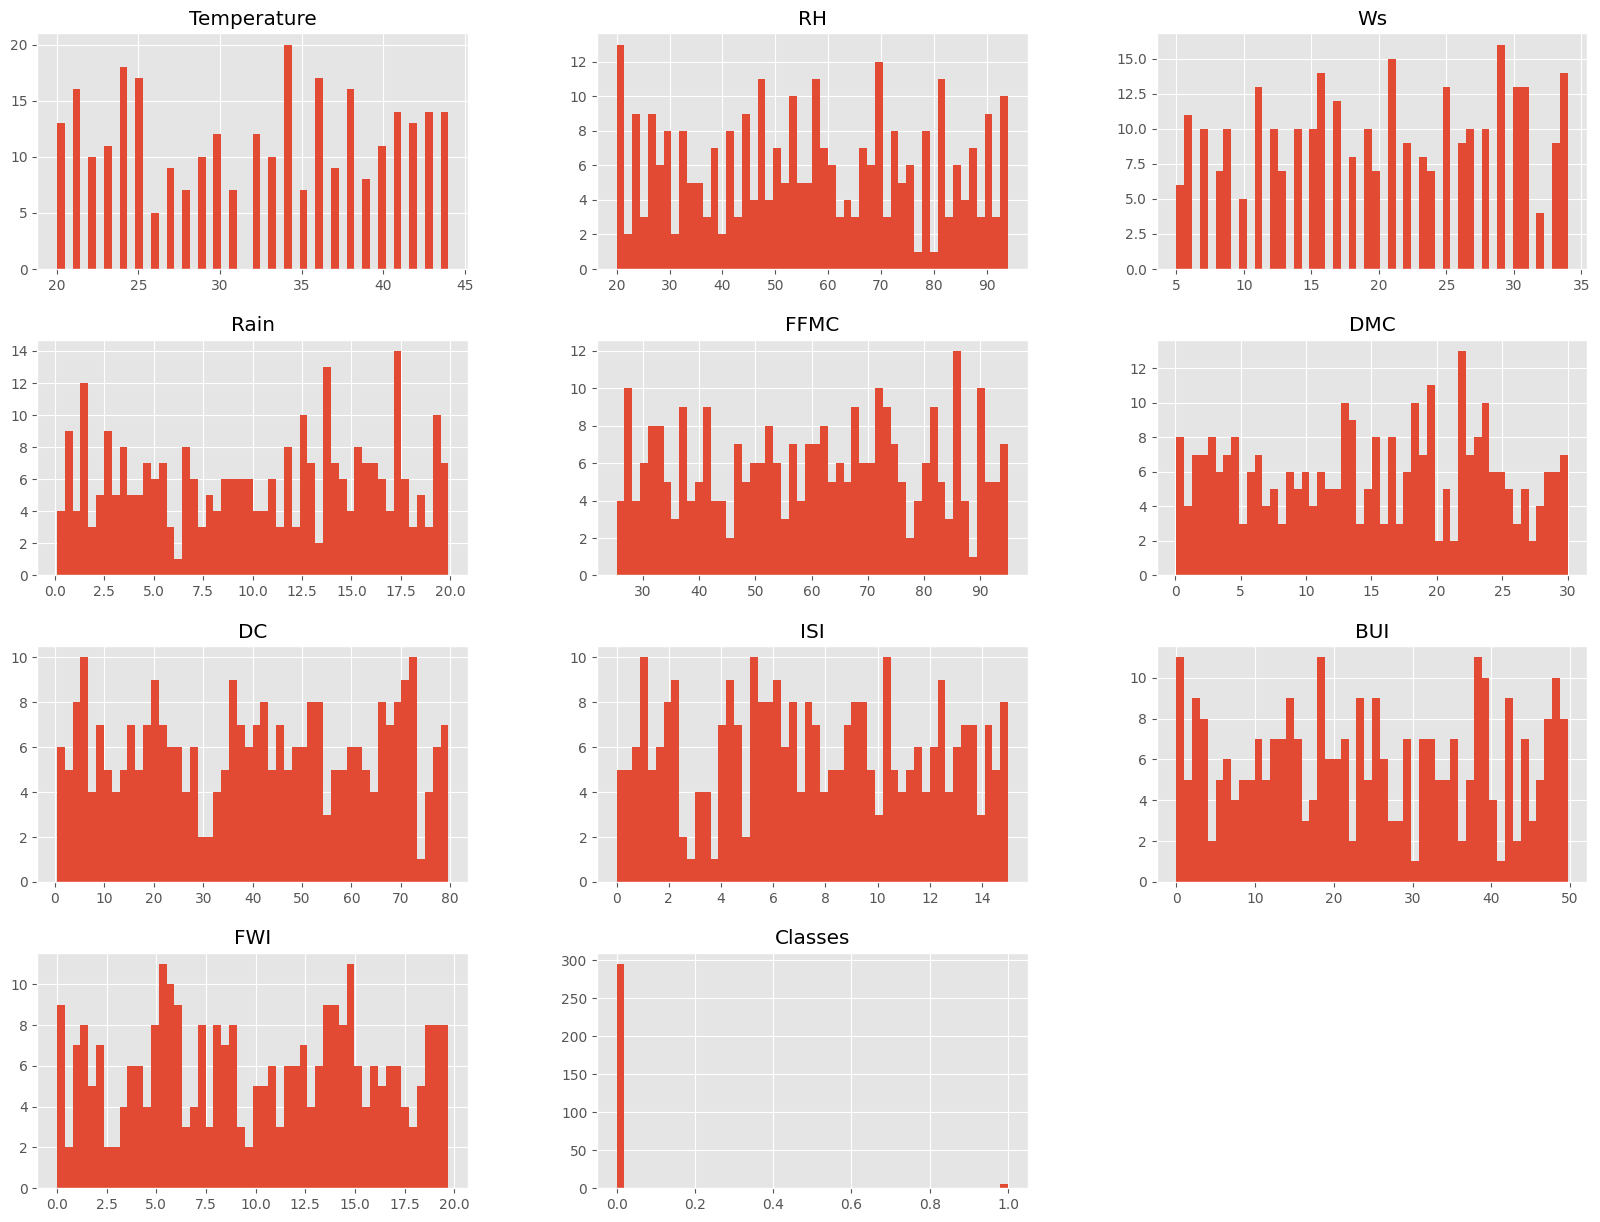

In [15]:
#plot density plot for all feature
plt.style.use("ggplot")
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [16]:
#percentage for the pie chart
percentage=df_copy["Classes"].value_counts(normalize=True)*100 #normalize means that it gives us the percentage

In [17]:
percentage

Classes
0    98.333333
1     1.666667
Name: proportion, dtype: float64

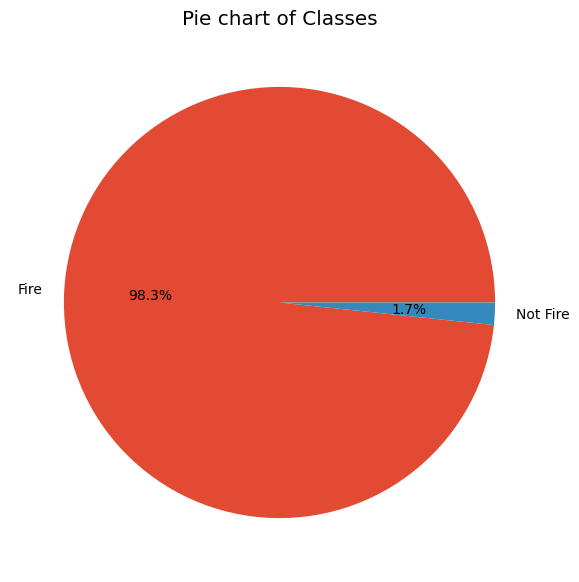

In [18]:
#plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct="%1.1f%%")
plt.title("Pie chart of Classes")
plt.show()

# Correlation    

In [19]:
df_copy.corr(numeric_only=True)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,0.014971,-0.022172,0.102377,-0.062639,0.054616,0.060309,0.069301,0.051536,0.014206,0.094857
RH,0.014971,1.000000,-0.091465,-0.065568,-0.015836,0.024242,-0.045261,0.069122,0.042172,0.095143,-0.178282
Ws,-0.022172,-0.091465,1.000000,0.017803,0.005054,0.014368,0.014059,-0.038461,-0.057371,0.024142,0.049716
Rain,0.102377,-0.065568,0.017803,1.000000,-0.071803,0.004698,0.015277,0.000340,0.026856,0.003950,-0.197141
FFMC,-0.062639,-0.015836,0.005054,-0.071803,1.000000,0.006298,0.041491,-0.026482,0.007721,-0.052413,-0.048724
DMC,0.054616,0.024242,0.014368,0.004698,0.006298,1.000000,0.001143,0.004427,0.038173,0.056154,0.055058
DC,0.060309,-0.045261,0.014059,0.015277,0.041491,0.001143,1.000000,-0.061460,-0.091815,-0.089920,0.060733
ISI,0.069301,0.069122,-0.038461,0.000340,-0.026482,0.004427,-0.061460,1.000000,0.021264,-0.049948,0.001174
BUI,0.051536,0.042172,-0.057371,0.026856,0.007721,0.038173,-0.091815,0.021264,1.000000,-0.007197,-0.044328
FWI,0.014206,0.095143,0.024142,0.003950,-0.052413,0.056154,-0.089920,-0.049948,-0.007197,1.000000,0.041374


<Axes: >

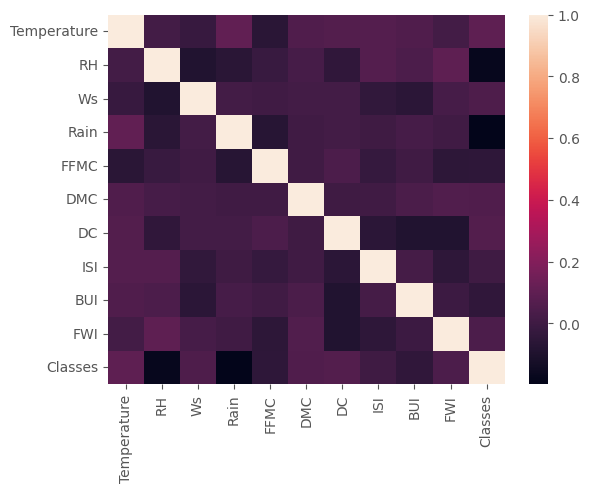

In [20]:
#if we have to plot the correlation
sns.heatmap(df_copy.corr(numeric_only=True))

<Axes: ylabel='FWI'>

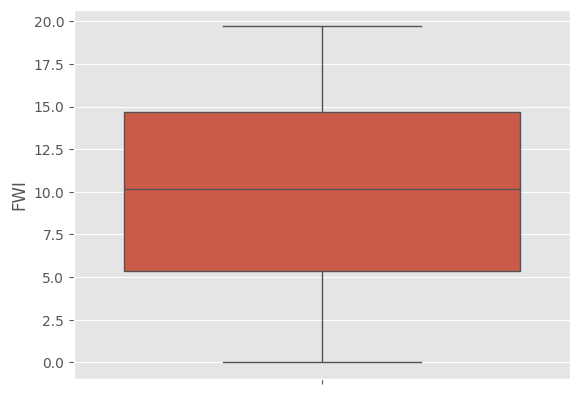

In [21]:
#Box plots
sns.boxplot(df_copy["FWI"])

Text(0.5, 1.0, 'Fire Analysis Regions')

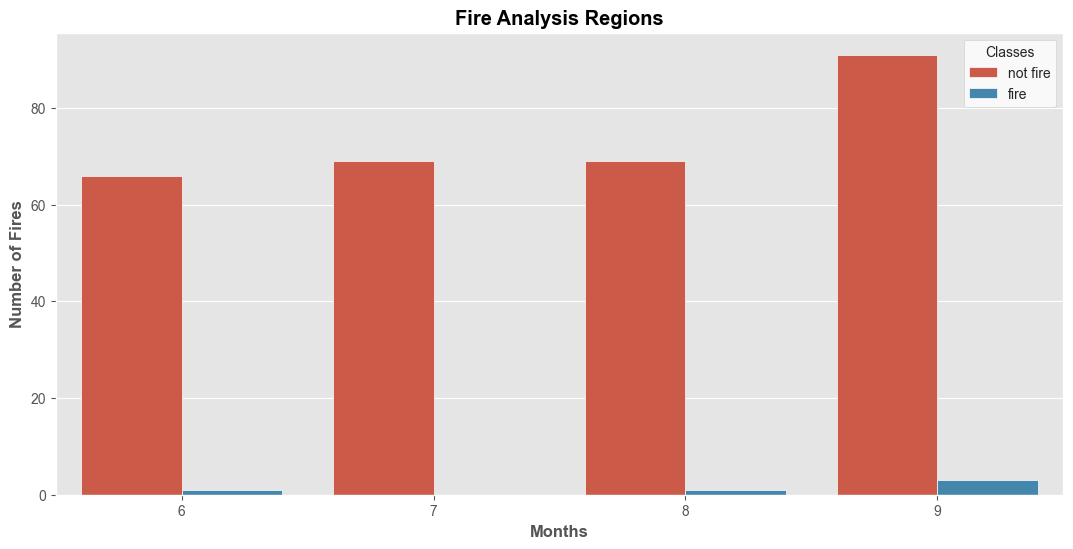

In [22]:
#Monthly fire analysis
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.ylabel("Number of Fires",weight="bold")
plt.xlabel("Months",weight="bold")
plt.title("Fire Analysis Regions",weight="bold")


# Model Trainning

In [23]:
df_copy.head()

,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia Region Dataset,38,22,21,3.7,42.4,4.1,5.5,0.6,24.8,5.6,0
1,Bejaia Region Dataset,24,52,9,15.6,68.2,28.9,4.6,1.6,14.2,8.5,0
2,Bejaia Region Dataset,34,25,29,7.0,74.5,16.5,22.6,5.1,6.7,0.8,0
3,Bejaia Region Dataset,44,69,10,1.2,36.7,29.0,20.9,12.0,31.5,2.6,0
4,Bejaia Region Dataset,21,29,30,19.4,36.7,13.0,19.8,8.6,2.7,15.3,0


In [24]:
df_copy["Region"].value_counts()

Region
Bejaia Region Dataset            150
Sidi-Bel Abbes Region Dataset    150
Name: count, dtype: int64

In [25]:
#now we have two regions so we have to give it to encoding (means that the first one give '0' and another one give the '1')
df_copy["Region"]=np.where(df["Region"].str.contains("Bejaia Region Dataset"),0,1)

In [ ]:
df_copy.head()

,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,38,22,21,3.7,42.4,4.1,5.5,0.6,24.8,5.6,0
1,0,24,52,9,15.6,68.2,28.9,4.6,1.6,14.2,8.5,0
2,0,34,25,29,7.0,74.5,16.5,22.6,5.1,6.7,0.8,0
3,0,44,69,10,1.2,36.7,29.0,20.9,12.0,31.5,2.6,0
4,0,21,29,30,19.4,36.7,13.0,19.8,8.6,2.7,15.3,0


In [27]:
df_copy["Region"].value_counts()

Region
0    150
1    150
Name: count, dtype: int64

In [ ]:
#Independent & Dependent feature
X=df_copy.drop("FWI",axis=1) #here we not include the FWI and 
y=df_copy["FWI"] #in this we include

In [29]:
X.head()

,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,0,38,22,21,3.7,42.4,4.1,5.5,0.6,24.8,0
1,0,24,52,9,15.6,68.2,28.9,4.6,1.6,14.2,0
2,0,34,25,29,7.0,74.5,16.5,22.6,5.1,6.7,0
3,0,44,69,10,1.2,36.7,29.0,20.9,12.0,31.5,0
4,0,21,29,30,19.4,36.7,13.0,19.8,8.6,2.7,0


In [30]:
y

0       5.6
1       8.5
2       0.8
3       2.6
4      15.3
       ... 
295    19.1
296     6.5
297     7.1
298    10.1
299    18.8
Name: FWI, Length: 300, dtype: float64

In [31]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [33]:
X_train.shape,X_test.shape

((225, 11), (75, 11))

In [34]:
#Feature selection on the based on the correlation
X_train.corr()

,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Region,1.000000,-0.029637,0.022837,-0.034990,-0.103359,0.024479,0.038875,0.027755,0.072950,0.089804,0.000598
Temperature,-0.029637,1.000000,0.052450,-0.029593,0.096202,-0.106079,0.058957,0.094267,0.093390,0.130596,0.102462
RH,0.022837,0.052450,1.000000,-0.122793,-0.093840,-0.038786,0.000890,0.017192,0.069759,-0.000649,-0.180058
Ws,-0.034990,-0.029593,-0.122793,1.000000,-0.002395,0.042649,0.024441,-0.006224,-0.048283,-0.033320,0.031139
Rain,-0.103359,0.096202,-0.093840,-0.002395,1.000000,-0.057794,-0.017011,0.017224,-0.041587,0.073731,-0.198415
FFMC,0.024479,-0.106079,-0.038786,0.042649,-0.057794,1.000000,0.010415,0.068501,-0.024038,0.040226,-0.081320
DMC,0.038875,0.058957,0.000890,0.024441,-0.017011,0.010415,1.000000,-0.007654,0.032818,-0.032866,0.060796
DC,0.027755,0.094267,0.017192,-0.006224,0.017224,0.068501,-0.007654,1.000000,-0.091191,-0.087872,0.060070
ISI,0.072950,0.093390,0.069759,-0.048283,-0.041587,-0.024038,0.032818,-0.091191,1.000000,0.035185,-0.006910
BUI,0.089804,0.130596,-0.000649,-0.033320,0.073731,0.040226,-0.032866,-0.087872,0.035185,1.000000,-0.043829


<Axes: >

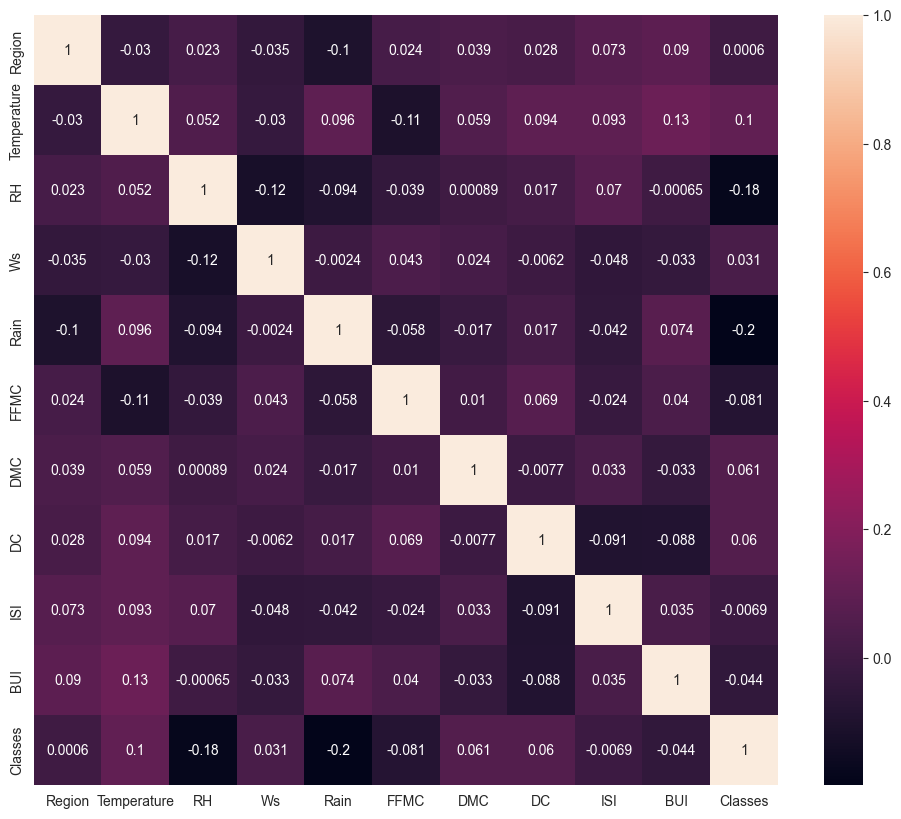

In [35]:
#Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [36]:
#basically the meaning of the multicolinearity means that we are deleting the feature that are too much co-related 
def correlation(dataset,thresold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thresold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
#threasold Domain expertise
correlation(X_train,0.10) #here the data is from the AI so it not have the high correlation the average value of the thresold is
#nearly 0.90 

{'BUI', 'Classes', 'FFMC', 'Rain', 'Ws'}

In [ ]:
#now dropping the features that have the more then 0.85 correlation
corr_feature=correlation(X_train,0.85)
corr_feature #it has no correlation more then 0.85 

set()

In [43]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((225, 11), (75, 11))

# Feature Scaling or Standardization

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [46]:
X_train_scaled

array([[ 1.00445437, -0.00593266, -1.30330055, ...,  0.54502921,
        -1.0054194 , -0.13453456],
       [-0.99556539, -0.27290213,  0.05300505, ...,  1.08827384,
         0.11879586, -0.13453456],
       [-0.99556539, -0.80684109, -0.4614557 , ...,  1.30084783,
         1.208944  , -0.13453456],
       ...,
       [-0.99556539, -0.40638687, -1.63068466, ..., -0.63593739,
        -1.58456059, -0.13453456],
       [ 1.00445437, -0.94032582, -0.7888398 , ..., -0.75403405,
         0.94322039, -0.13453456],
       [-0.99556539,  0.79497578, -0.36791738, ...,  0.52140987,
         0.99091437, -0.13453456]], shape=(225, 11))

### Box plot to understand effect of standard scaler

Text(0.5, 1.0, 'X_train after Scaling')

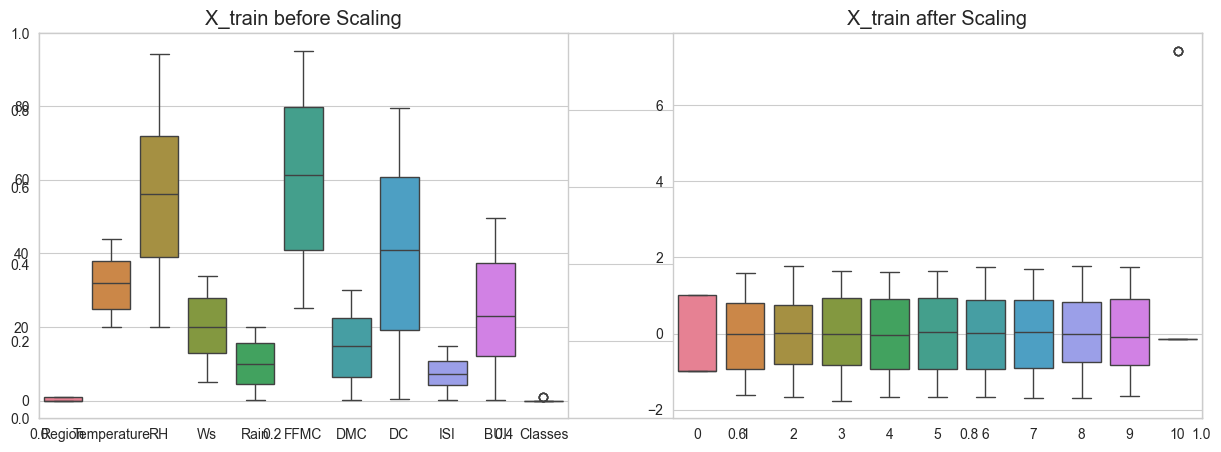

In [48]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling")

# Model Training

### Firstly we apply the Linear Regression Model

Mean absolute error 5.12698177743964
R2 Score -0.04338427379458398


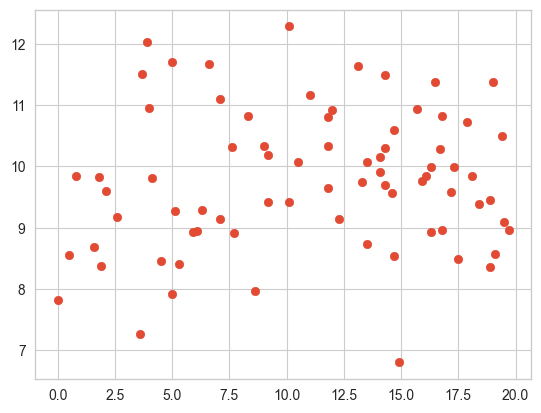

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred) #here our model is not so good because of the dataset is from AI 

# Lasso Regression

Mean absolute error 5.231253333333334
R2 Score -0.052146086881895704


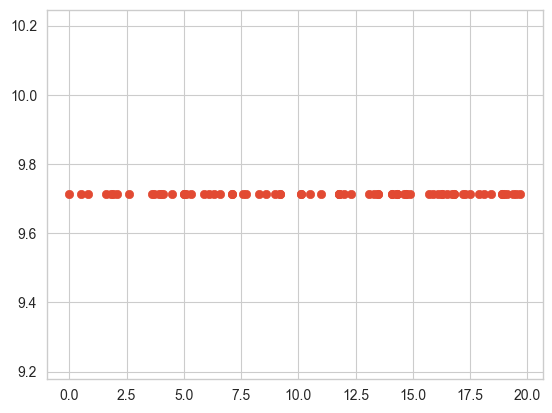

In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred) #here our model is not so good because of the dataset is from AI 

# Ridge Regression

Mean absolute error 5.12686781780088
R2 Score -0.04311603174515688


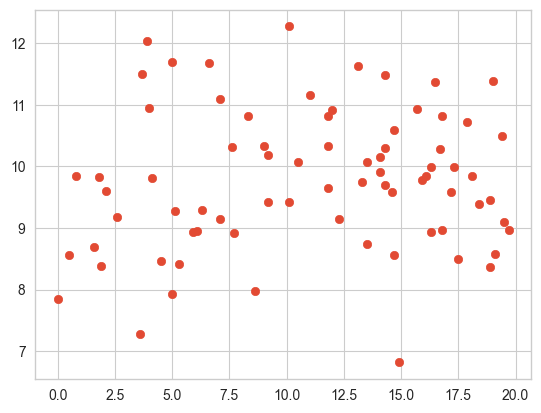

In [54]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred) #here our model is not so good because of the dataset is from AI 

# Elasticnet Regression

Mean absolute error 5.227779713107771
R2 Score -0.05088115501074464


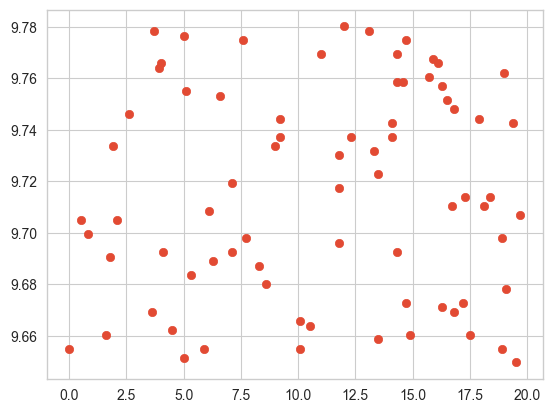

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic_net=ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred=elastic_net.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred) #here our model is not so good because of the dataset is from AI 

### Cross-Validation using the Lasso

In [ ]:

from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [59]:
lassocv.predict(X_test_scaled)

array([9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712,
       9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712,
       9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712,
       9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712,
       9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712,
       9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712,
       9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712,
       9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712, 9.712,
       9.712, 9.712, 9.712])

In [60]:
lassocv.alpha_

np.float64(0.5573345494280556)

In [61]:
lassocv.alphas_

array([0.55733455, 0.51977207, 0.48474117, 0.45207124, 0.42160315,
       0.39318851, 0.36668892, 0.34197531, 0.31892732, 0.29743269,
       0.27738672, 0.25869178, 0.24125682, 0.22499692, 0.20983288,
       0.19569085, 0.18250194, 0.17020192, 0.15873088, 0.14803295,
       0.13805602, 0.12875151, 0.12007409, 0.1119815 , 0.10443432,
       0.0973958 , 0.09083164, 0.0847099 , 0.07900073, 0.07367635,
       0.06871081, 0.06407993, 0.05976116, 0.05573345, 0.05197721,
       0.04847412, 0.04520712, 0.04216031, 0.03931885, 0.03666889,
       0.03419753, 0.03189273, 0.02974327, 0.02773867, 0.02586918,
       0.02412568, 0.02249969, 0.02098329, 0.01956908, 0.01825019,
       0.01702019, 0.01587309, 0.01480329, 0.0138056 , 0.01287515,
       0.01200741, 0.01119815, 0.01044343, 0.00973958, 0.00908316,
       0.00847099, 0.00790007, 0.00736763, 0.00687108, 0.00640799,
       0.00597612, 0.00557335, 0.00519772, 0.00484741, 0.00452071,
       0.00421603, 0.00393189, 0.00366689, 0.00341975, 0.00318

In [62]:
lassocv.mse_path_

array([[30.74075984, 33.46031111, 30.79675036, 37.63338268, 31.96807675],
       [30.72663727, 33.46031111, 30.82716587, 37.68976933, 31.96362474],
       [30.71568294, 33.46031111, 30.86019976, 37.74443022, 31.96248034],
       [30.70739464, 33.5222768 , 30.89842557, 37.79642025, 31.98052737],
       [30.70134159, 33.59242817, 30.93864758, 37.84033303, 32.09259729],
       [30.670124  , 33.6663515 , 30.98013492, 37.84015939, 32.1741396 ],
       [30.65238514, 33.76805131, 31.02228442, 37.83791294, 32.19443374],
       [30.63943433, 33.86884779, 31.06460101, 37.85281107, 32.21964452],
       [30.63048104, 33.96610513, 31.12124419, 37.88153243, 32.25724697],
       [30.58651279, 34.05963798, 31.25174924, 37.91256851, 32.30079952],
       [30.5380492 , 34.14932869, 31.38611258, 37.94520918, 32.34611039],
       [30.55210818, 34.23511558, 31.5208452 , 37.97886484, 32.39244351],
       [30.60226401, 34.31698431, 31.65263798, 38.01304836, 32.43917687],
       [30.6546588 , 34.39216207, 31.7

Mean absolute error 5.231253333333334
R2 Score -0.052146086881895704


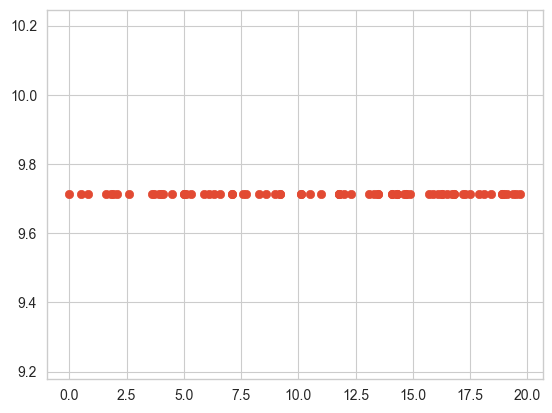

In [64]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)  #here our model is not so good because of the dataset is from AI 

### RidgeCV

c:\VS-Code_Play-Ground\Complete_ML_by_Krish\Complete_ML_by_Krish\venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(


Mean absolute error 25.492188094897845
R2 Score -28.97465033398896


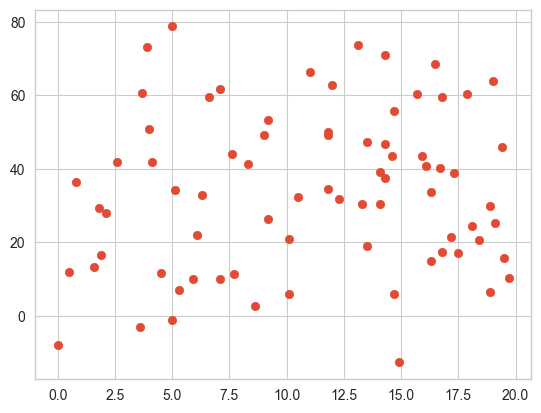

In [66]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)  #here our model is not so good because of the dataset is from AI 

In [71]:
ridgecv.alpha_

np.float64(10.0)

In [74]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [75]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

### ElasticnetCV

Mean absolute error 5.231253333333332
R2 Score -0.05214608688189526


c:\VS-Code_Play-Ground\Complete_ML_by_Krish\Complete_ML_by_Krish\venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(


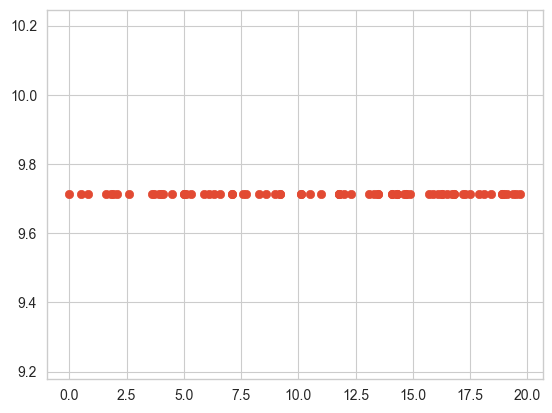

In [76]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv=ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scaled,y_train)
y_pred=elastic_net_cv.predict(X_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 Score",score)  #here our model is not so good because of the dataset is from AI 

In [79]:
elastic_net_cv.alpha_

np.float64(1.1146690988561112)

In [80]:
elastic_net_cv.alphas_

array([1.1146691 , 1.03954413, 0.96948234, 0.90414247, 0.8432063 ,
       0.78637701, 0.73337783, 0.68395062, 0.63785464, 0.59486537,
       0.55477344, 0.51738356, 0.48251364, 0.44999384, 0.41966576,
       0.39138169, 0.36500388, 0.34040384, 0.31746176, 0.2960659 ,
       0.27611205, 0.25750302, 0.24014818, 0.22396299, 0.20886864,
       0.19479159, 0.18166329, 0.16941979, 0.15800146, 0.14735269,
       0.13742162, 0.12815986, 0.11952231, 0.11146691, 0.10395441,
       0.09694823, 0.09041425, 0.08432063, 0.0786377 , 0.07333778,
       0.06839506, 0.06378546, 0.05948654, 0.05547734, 0.05173836,
       0.04825136, 0.04499938, 0.04196658, 0.03913817, 0.03650039,
       0.03404038, 0.03174618, 0.02960659, 0.0276112 , 0.0257503 ,
       0.02401482, 0.0223963 , 0.02088686, 0.01947916, 0.01816633,
       0.01694198, 0.01580015, 0.01473527, 0.01374216, 0.01281599,
       0.01195223, 0.01114669, 0.01039544, 0.00969482, 0.00904142,
       0.00843206, 0.00786377, 0.00733378, 0.00683951, 0.00637